In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random
import warnings
warnings.filterwarnings('ignore')

In [23]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [24]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.373205,-0.581953,-2.424847,1.902018,-0.823174,1
1,-0.725977,0.938795,-0.708695,1.378035,-1.651567,0
2,0.351735,-0.251057,-0.887493,-0.085815,-1.200753,0
3,-0.515207,-1.773039,1.482922,-0.716511,-0.096167,1
4,0.408799,-0.477723,-1.367559,-1.784139,0.010612,0


## Row sampling (pasting)

In [25]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [29]:
df11 = sample_rows(df,0.1)
df11

,col1,col2,col3,col4,col5,target
14,0.597629,1.667017,0.092119,0.195796,-1.675163,0
7,0.695490,-0.062528,-1.186899,2.098125,-0.141786,1
66,-1.212732,-1.153184,-1.545863,1.141131,0.942043,1
66,-1.212732,-1.153184,-1.545863,1.141131,0.942043,1
34,1.098403,-0.073662,-1.538454,-3.236722,0.099079,0
88,-0.377384,-1.758837,-1.819389,-2.206480,-1.083079,0
41,0.093919,0.548746,-1.763060,2.740036,0.643471,1
81,2.347940,1.706597,-1.764570,-3.607608,-0.299773,0
37,-1.506658,-1.566221,-1.428115,0.753102,-0.256331,1
52,-0.753901,-0.909629,-1.306844,0.433348,-0.370620,0


In [30]:
df12 = sample_rows(df,0.1)
df12

,col1,col2,col3,col4,col5,target
53,-0.077785,-1.030750,1.262165,0.095820,0.237409,1
5,-1.840786,-2.509865,-0.024571,-0.667899,-1.536960,1
52,-0.753901,-0.909629,-1.306844,0.433348,-0.370620,0
82,0.009498,-1.216083,0.412510,0.352008,-0.502791,1
82,0.009498,-1.216083,0.412510,0.352008,-0.502791,1
6,-0.732974,-0.332198,-1.097606,-0.072520,-0.608630,0
74,-0.873293,-0.301352,-2.139252,2.085064,-1.831367,1
53,-0.077785,-1.030750,1.262165,0.095820,0.237409,1
68,-2.367041,-1.210029,0.301295,-0.073860,-0.771713,1
88,-0.377384,-1.758837,-1.819389,-2.206480,-1.083079,0


In [31]:
df13 = sample_rows(df,0.1)
df13

,col1,col2,col3,col4,col5,target
84,-0.020501,-1.802707,-0.160779,0.208467,-0.584544,1
30,0.775442,1.677573,-0.255865,-0.591734,-1.154785,0
42,-2.790326,-0.145155,-3.423050,2.494534,-1.001413,1
60,1.588636,0.065297,-2.108300,-1.406749,0.075937,0
68,-2.367041,-1.210029,0.301295,-0.073860,-0.771713,1
99,0.424973,-1.280219,-1.637294,1.321514,-1.354746,1
49,1.836415,1.202080,-1.124405,-1.297903,-1.035945,0
12,0.688255,0.512829,-1.141532,2.554611,-1.169614,1
63,-0.366740,0.415476,-0.754626,2.024050,0.318933,1
13,-1.055349,-0.676001,-3.376326,2.357949,-2.278619,1


In [32]:
print(df11.shape)
print(df12.shape)
print(df13.shape)

(10, 6)
(10, 6)
(10, 6)


In [33]:
from sklearn.tree import DecisionTreeClassifier
clf11 = DecisionTreeClassifier()
clf12 = DecisionTreeClassifier()
clf13 = DecisionTreeClassifier()

In [35]:
clf11.fit(df11.iloc[:,0:5],df11.iloc[:,-1])
clf12.fit(df12.iloc[:,0:5],df12.iloc[:,-1])
clf13.fit(df13.iloc[:,0:5],df13.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.75, 'x[3] <= 0.593\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

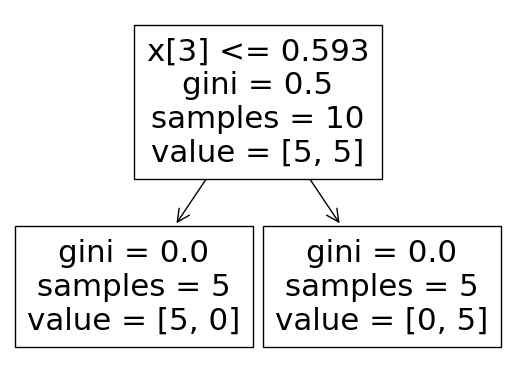

In [36]:
from sklearn.tree import plot_tree
plot_tree(clf11)

[Text(0.6, 0.8333333333333334, 'x[2] <= -0.561\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.4, 0.5, 'x[1] <= -0.317\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

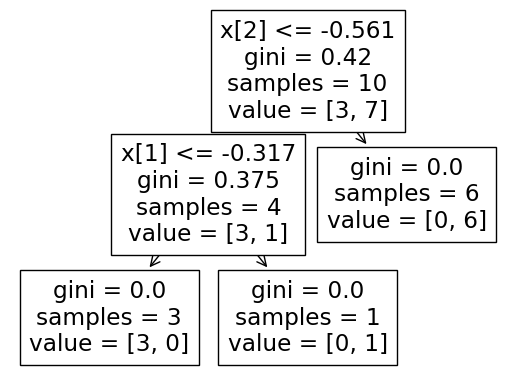

In [37]:
plot_tree(clf12)

[Text(0.5, 0.75, 'x[3] <= -0.333\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

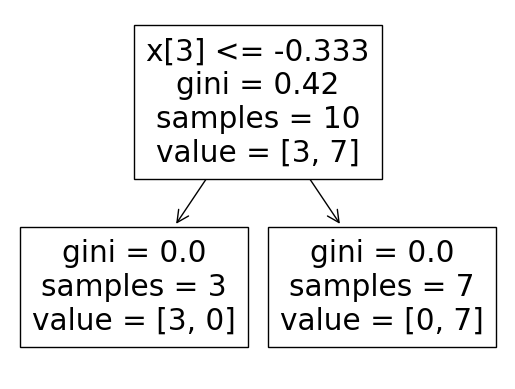

In [38]:
plot_tree(clf13)

In [39]:
clf11.predict(np.array([-1.373205,-0.581953,-2.424847,1.902018,-0.823174]).reshape(1,5))

array([1])

In [40]:
clf12.predict(np.array([-1.373205,-0.581953,-2.424847,1.902018,-0.823174]).reshape(1,5))

array([0])

In [41]:
clf13.predict(np.array([-1.373205,-0.581953,-2.424847,1.902018,-0.823174]).reshape(1,5))

array([1])

## Column Sampling (random subspaces)

In [67]:
# function for feature sampling
def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
#     return df[cols]
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df
    

In [68]:
df21 = sample_features(df,0.8)
df21

,col4,col2,col3,col5,target
0,1.902018,-0.581953,-2.424847,-0.823174,1
1,1.378035,0.938795,-0.708695,-1.651567,0
2,-0.085815,-0.251057,-0.887493,-1.200753,0
3,-0.716511,-1.773039,1.482922,-0.096167,1
4,-1.784139,-0.477723,-1.367559,0.010612,0
...,...,...,...,...,...
95,-0.819851,1.109904,-1.478030,-2.541324,0
96,-0.878831,0.129404,-1.865625,-0.522771,0
97,0.441557,-0.367768,1.744781,0.323111,1
98,0.126081,2.573937,-0.027297,-1.993351,0


In [69]:
df22 = sample_features(df,0.8)
df22

,col3,col4,col5,col1,target
0,-2.424847,1.902018,-0.823174,-1.373205,1
1,-0.708695,1.378035,-1.651567,-0.725977,0
2,-0.887493,-0.085815,-1.200753,0.351735,0
3,1.482922,-0.716511,-0.096167,-0.515207,1
4,-1.367559,-1.784139,0.010612,0.408799,0
...,...,...,...,...,...
95,-1.478030,-0.819851,-2.541324,1.576621,0
96,-1.865625,-0.878831,-0.522771,1.263931,0
97,1.744781,0.441557,0.323111,0.111709,1
98,-0.027297,0.126081,-1.993351,1.010277,0


In [70]:
df23 = sample_features(df,0.8)
df23

,col1,col5,col4,col3,target
0,-1.373205,-0.823174,1.902018,-2.424847,1
1,-0.725977,-1.651567,1.378035,-0.708695,0
2,0.351735,-1.200753,-0.085815,-0.887493,0
3,-0.515207,-0.096167,-0.716511,1.482922,1
4,0.408799,0.010612,-1.784139,-1.367559,0
...,...,...,...,...,...
95,1.576621,-2.541324,-0.819851,-1.478030,0
96,1.263931,-0.522771,-0.878831,-1.865625,0
97,0.111709,0.323111,0.441557,1.744781,1
98,1.010277,-1.993351,0.126081,-0.027297,0


In [71]:
print(df21.shape)
print(df22.shape)
print(df23.shape)

(100, 5)
(100, 5)
(100, 5)


In [72]:
print(df21.columns)
print(df22.columns)
print(df23.columns)

Index(['col4', 'col2', 'col3', 'col5', 'target'], dtype='object')
Index(['col3', 'col4', 'col5', 'col1', 'target'], dtype='object')
Index(['col1', 'col5', 'col4', 'col3', 'target'], dtype='object')


In [78]:
df23

,col1,col5,col4,col3,target
0,-1.373205,-0.823174,1.902018,-2.424847,1
1,-0.725977,-1.651567,1.378035,-0.708695,0
2,0.351735,-1.200753,-0.085815,-0.887493,0
3,-0.515207,-0.096167,-0.716511,1.482922,1
4,0.408799,0.010612,-1.784139,-1.367559,0
...,...,...,...,...,...
95,1.576621,-2.541324,-0.819851,-1.478030,0
96,1.263931,-0.522771,-0.878831,-1.865625,0
97,0.111709,0.323111,0.441557,1.744781,1
98,1.010277,-1.993351,0.126081,-0.027297,0


In [73]:
from sklearn.tree import DecisionTreeClassifier
clf21 = DecisionTreeClassifier()
clf22 = DecisionTreeClassifier()
clf23 = DecisionTreeClassifier()

In [74]:
clf21.fit(df21.iloc[:,0:4],df21.iloc[:,-1])
clf22.fit(df22.iloc[:,0:4],df22.iloc[:,-1])
clf23.fit(df23.iloc[:,0:4],df23.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.4583333333333333, 0.9, 'x[0] <= -0.217\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.25, 0.7, 'x[1] <= -1.766\ngini = 0.184\nsamples = 39\nvalue = [35, 4]'),
 Text(0.16666666666666666, 0.5, 'x[2] <= -1.84\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.6666666666666666, 0.7, 'x[1] <= 0.792\ngini = 0.371\nsamples = 61\nvalue = [15, 46]'),
 Text(0.5, 0.5, 'x[0] <= 0.437\ngini = 0.122\nsamples = 46\nvalue = [3, 43]'),
 Text(0.4166666666666667, 0.3, 'x[1] <= -0.97\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5833333333333334, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]'),
 Text(0.8333333333333334, 0.5, 'x[0

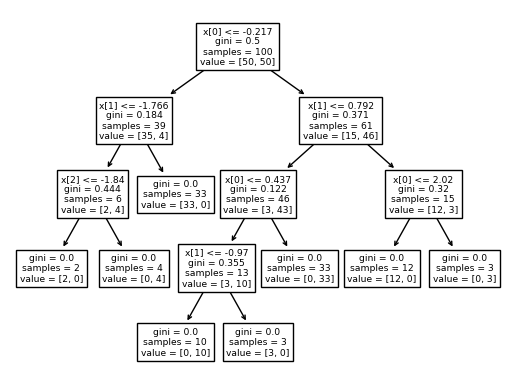

In [75]:
from sklearn.tree import plot_tree
plot_tree(clf21)

[Text(0.5333333333333333, 0.9375, 'x[3] <= 0.123\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.2, 0.8125, 'x[1] <= -1.638\ngini = 0.269\nsamples = 50\nvalue = [8, 42]'),
 Text(0.13333333333333333, 0.6875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.26666666666666666, 0.6875, 'x[3] <= -1.162\ngini = 0.219\nsamples = 48\nvalue = [6, 42]'),
 Text(0.2, 0.5625, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.3333333333333333, 0.5625, 'x[3] <= -0.68\ngini = 0.337\nsamples = 28\nvalue = [6, 22]'),
 Text(0.13333333333333333, 0.4375, 'x[0] <= -1.689\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.06666666666666667, 0.3125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.2, 0.3125, 'x[0] <= 0.49\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.13333333333333333, 0.1875, 'x[1] <= 1.841\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.06666666666666667, 0.0625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.2, 0.0625, 'gini = 0.0\nsamples = 1\nvalue 

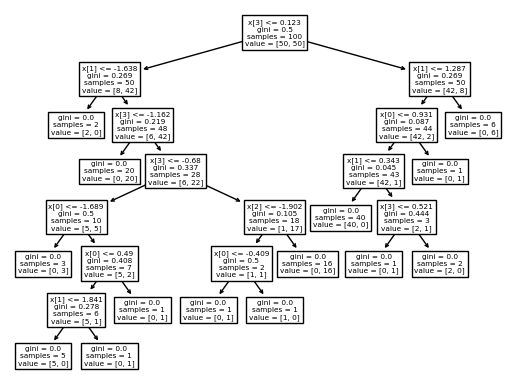

In [76]:
plot_tree(clf22)

[Text(0.5, 0.95, 'x[0] <= 0.123\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.13333333333333333, 0.85, 'x[2] <= -1.638\ngini = 0.269\nsamples = 50\nvalue = [8, 42]'),
 Text(0.06666666666666667, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2, 0.75, 'x[3] <= -1.379\ngini = 0.219\nsamples = 48\nvalue = [6, 42]'),
 Text(0.13333333333333333, 0.65, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.26666666666666666, 0.65, 'x[3] <= -1.306\ngini = 0.337\nsamples = 28\nvalue = [6, 22]'),
 Text(0.2, 0.55, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.55, 'x[1] <= -1.621\ngini = 0.26\nsamples = 26\nvalue = [4, 22]'),
 Text(0.2, 0.45, 'x[1] <= -2.27\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.13333333333333333, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.26666666666666666, 0.35, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4666666666666667, 0.45, 'x[1] <= -0.597\ngini = 0.159\nsamples = 23\nvalue = [2, 21]'),
 Text

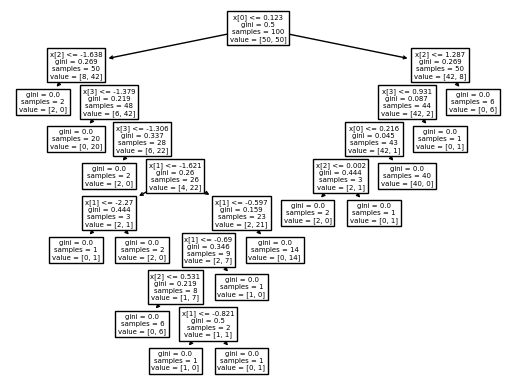

In [77]:
plot_tree(clf23)

In [79]:
clf21.predict(np.array([-1.373205,-0.823174,1.902018,-2.424847]).reshape(1,4))

array([0])

In [80]:
clf22.predict(np.array([-1.373205,-0.823174,1.902018,-2.424847]).reshape(1,4))

array([1])

In [81]:
clf23.predict(np.array([-1.373205,-0.823174,1.902018,-2.424847]).reshape(1,4))

array([1])

## Combine Sampling (random patches)

In [95]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [96]:
df31 = combined_sampling(df,0.5,0.5)

In [97]:
df32 = combined_sampling(df,0.5,0.5)

In [98]:
df33 = combined_sampling(df,0.5,0.5)

In [99]:
print(df31.columns)
print(df32.columns)
print(df33.columns)

Index(['col1', 'col2', 'target'], dtype='object')
Index(['col2', 'col3', 'target'], dtype='object')
Index(['col1', 'col2', 'target'], dtype='object')


In [100]:
df33

,col1,col2,target
33,2.227638,2.456141,0
99,0.424973,-1.280219,1
50,0.477419,1.509832,1
3,-0.515207,-1.773039,1
33,2.227638,2.456141,0
81,2.347940,1.706597,0
52,-0.753901,-0.909629,0
64,-0.733048,-2.102247,1
66,-1.212732,-1.153184,1
41,0.093919,0.548746,1


In [101]:
from sklearn.tree import DecisionTreeClassifier
clf31 = DecisionTreeClassifier()
clf32 = DecisionTreeClassifier()
clf33 = DecisionTreeClassifier()

In [102]:
clf31.fit(df31.iloc[:,0:2],df31.iloc[:,-1])
clf32.fit(df32.iloc[:,0:2],df32.iloc[:,-1])
clf33.fit(df33.iloc[:,0:2],df33.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5694444444444444, 0.9285714285714286, 'x[1] <= -0.04\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.3055555555555556, 0.7857142857142857, 'x[0] <= 0.177\ngini = 0.342\nsamples = 32\nvalue = [7, 25]'),
 Text(0.1111111111111111, 0.6428571428571429, 'x[0] <= -0.803\ngini = 0.159\nsamples = 23\nvalue = [2, 21]'),
 Text(0.05555555555555555, 0.5, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.16666666666666666, 0.5, 'x[0] <= -0.275\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.1111111111111111, 0.35714285714285715, 'x[0] <= -0.583\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.05555555555555555, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16666666666666666, 0.21428571428571427, 'x[0] <= -0.405\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2222222222222222, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0

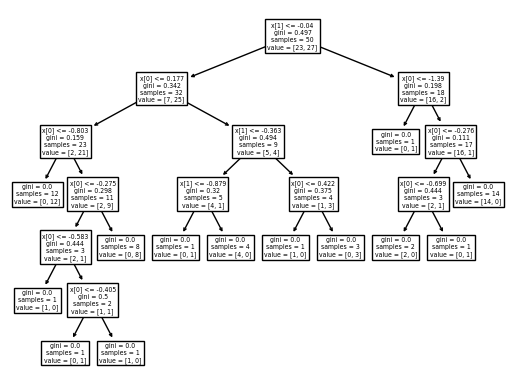

In [103]:
from sklearn.tree import plot_tree
plot_tree(clf31)

[Text(0.5416666666666666, 0.9444444444444444, 'x[0] <= 1.14\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.25, 0.8333333333333334, 'x[1] <= -1.934\ngini = 0.389\nsamples = 34\nvalue = [9, 25]'),
 Text(0.16666666666666666, 0.7222222222222222, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.3333333333333333, 0.7222222222222222, 'x[0] <= -0.355\ngini = 0.461\nsamples = 25\nvalue = [9, 16]'),
 Text(0.16666666666666666, 0.6111111111111112, 'x[1] <= -1.77\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.5, 0.6111111111111112, 'x[1] <= -1.596\ngini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(0.4166666666666667, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5833333333333334, 0.5, 'x[0] <= 0.133\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.5, 0.3888888888888889, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6

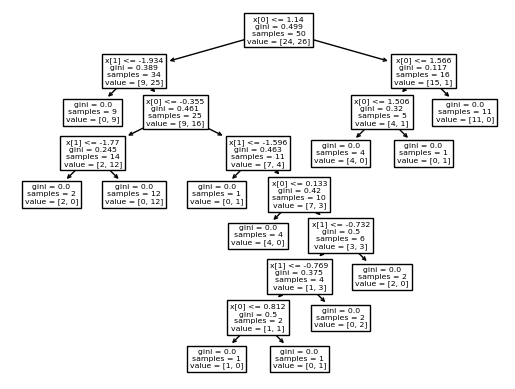

In [104]:
plot_tree(clf32)

[Text(0.5, 0.9375, 'x[0] <= 0.538\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.2, 0.8125, 'x[0] <= -0.814\ngini = 0.285\nsamples = 29\nvalue = [5, 24]'),
 Text(0.1, 0.6875, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.3, 0.6875, 'x[0] <= -0.743\ngini = 0.388\nsamples = 19\nvalue = [5, 14]'),
 Text(0.2, 0.5625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4, 0.5625, 'x[0] <= -0.214\ngini = 0.291\nsamples = 17\nvalue = [3, 14]'),
 Text(0.2, 0.4375, 'x[1] <= -2.1\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.1, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3, 0.3125, 'x[1] <= -1.935\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.1875, 'x[0] <= -0.624\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.4375, 'x[0] <= 0.251\ngini = 0.153\ns

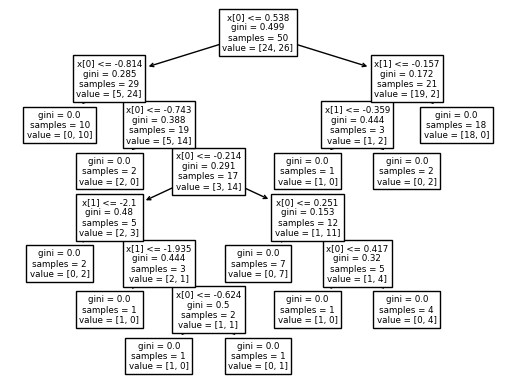

In [105]:
plot_tree(clf33)

In [109]:
clf31.predict(np.array([2.227638,2.456141]).reshape(1,2))

array([0])

In [110]:
clf32.predict(np.array([2.227638,2.456141]).reshape(1,2))

array([0])

In [111]:
clf33.predict(np.array([2.227638,2.456141]).reshape(1,2))

array([0])